[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Anutri03/BIA/blob/main/Deep_lrn/Image_classification_CNN.ipynb)


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import  layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [6]:
train_labels = to_categorical (y_train)
test_labels = to_categorical (y_test)

In [9]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape = (32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, epochs=25,
                    validation_data=(x_test, y_test))

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7635 - loss: 0.7261 - val_accuracy: 0.7488 - val_loss: 0.8119
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7855 - loss: 0.6536 - val_accuracy: 0.7348 - val_loss: 0.8663
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7916 - loss: 0.6358 - val_accuracy: 0.7485 - val_loss: 0.8306
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8142 - loss: 0.5651 - val_accuracy: 0.7429 - val_loss: 0.8376
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8111 - loss: 0.5742 - val_accuracy: 0.7262 - val_loss: 0.9131
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8258 - loss: 0.5342 - val_accuracy: 0.7387 - val_loss: 0.9004
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8194 - loss: 0.5540 - val_accuracy: 0.7413 - val_loss: 0.9670
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8364 - loss: 0.494

In [24]:
test_loss, test_acc = model.evaluate(x_test,  y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7254 - loss: 1.2927
0.7257000207901001


In [34]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

def plot_example_predicition():
  predictions = model.predict(x_test)
  num_rows , num_cols = 5,5
  plt.figure(figsize=(10,10))
  for i in range(num_rows*num_cols):
    plt.subplot(num_rows,num_cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i],cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels[i])
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
    plt.xlabel(f"{class_names[predicted_label]}({class_names[true_label]})",color=color)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


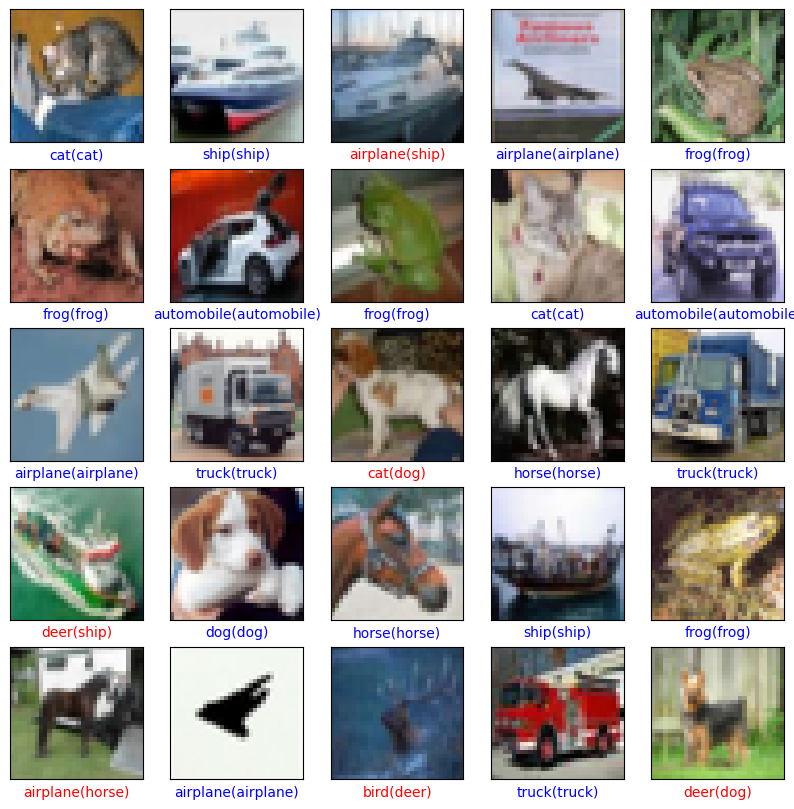

In [35]:
plot_example_predicition()
plt.show()